# A/B-тестирование

# Постановка задачи

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

Оцените корректность проведения теста и проанализируйте его результаты.

Чтобы оценить корректность проведения теста:

- удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;
- проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

Подробнее об этом мы рассказываем в разделе «Как выполнить задание» в конце урока.

# Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

### Описание данных

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

### Ход выполнения задания

### Цель исследования

Определить результаты A/B-теста и оценить корректность его проведения.

### Исследование данных

1. Определить, требуется ли преобразование типов данных.
2. Описать природу пропущенных значений и дубликатов, если они присутствуют.

### Оценка корректности проведения теста

1. Проверить соответствие данных требованиям технического задания.
2. Убедиться, что время проведения теста не совпадает с маркетинговыми и другими активностями.
3. Проверить аудиторию теста:
   - Отсутствие пересечений с конкурирующим тестом
   - Отсутствие пользователей, участвующих в двух группах теста одновременно
   - Равномерность распределения по тестовым группам и правильность их формирования

### Исследовательский анализ данных

1. Определить, распределены ли одинаково количество событий на пользователя в выборках.
2. Изучить распределение числа событий в выборках по дням.
3. Оценить изменение конверсии в воронке на разных этапах в выборках.
4. Определить особенности данных, которые нужно учесть перед A/B-тестированием.

### Оценка результатов A/B-тестирования

1. Проанализировать результаты A/B-тестирования.
2. Проверить статистическую разницу долей с использованием z-критерия.

### Выводы

1. Описать выводы по этапу исследовательского анализа данных и оценке результатов A/B-тестирования.
2. Сделать общее заключение о корректности проведения теста.

# Цели исследования  
  
  
- Оценить корректность проведения теста
- Проанализировать результаты теста

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import stats as st
import numpy as np
from datetime import datetime,date
import datetime as dt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import math as mth

# Исследование данных

In [2]:
# открываю данные
marketings = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
marketings.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [3]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [4]:
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [5]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [6]:
marketings.info()

print('Количество дубликатов:', marketings.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
Количество дубликатов: 0


In [7]:
marketings.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

В датасете marketings отсутствуют пропуски и дубликаты. Столбцы 'start_dt' и 'finish_dt' нужно привести к типу datetime

In [8]:
marketings['start_dt'] = pd.to_datetime(marketings['start_dt'], format='%Y-%m-%d')
marketings['finish_dt'] = pd.to_datetime(marketings['finish_dt'], format='%Y-%m-%d')

In [9]:
users.info()

print('Количество дубликатов:', users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
Количество дубликатов: 0


In [10]:
users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

В датасете users отсутствуют пропуски и дубликаты. Столбец 'first_date' нужно привести к типу datetime

In [11]:
users['first_date'] = pd.to_datetime(users['first_date'], format='%Y-%m-%d')

In [12]:
events.info()

print('Количество дубликатов:', events.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
Количество дубликатов: 0


In [13]:
events.isna().mean()

user_id       0.000000
event_dt      0.000000
event_name    0.000000
details       0.857512
dtype: float64

В датасете events отсутствуют дубликаты. Присутствуют пропуски в столбце 'details' - 85%.

Столбец 'event_dt' нужно привести к типу datetime

In [14]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [15]:
participants.info()
print('Количество дубликатов:', participants.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
Количество дубликатов: 0


In [16]:
participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

В датасете participants отсутствуют пропуски и дубликаты. Типы данных соответсвуют.

<AxesSubplot:>

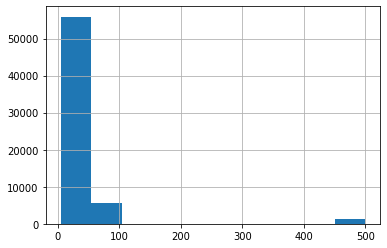

In [17]:
events['details'].hist()

In [18]:
events['details'].describe()

count    62740.000000
mean        23.877631
std         72.180465
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64

In [19]:
events_isna = events[events['details'].isna()]
events_isna.head(5)

,user_id,event_dt,event_name,details
62740,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
62741,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
62742,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
62743,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
62744,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN


Добавим столбец 'details_NaN'

In [20]:
events['details_Nan'] = np.where(events['details'].isnull(), 0,1)
events.head()

,user_id,event_dt,event_name,details,details_Nan
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,1
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,1
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,1
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,1
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,1


In [21]:
events.groupby(['details_Nan']) ['event_name'].value_counts(normalize=True)

details_Nan  event_name  
0            login           0.502022
             product_page    0.332549
             product_cart    0.165429
1            purchase        1.000000
Name: event_name, dtype: float64

Возможные причины пропусков могут быть связаны с ошибкой при выгрузке данных. Если рассмотреть группировку, большое количество пропусков наблюдается в наименованиях событий, таких как login, product_page и product_cart. Это может свидетельствовать о том, что цены для этих событий просто не были внесены в данные. В любом случае, на данном этапе я оставлю эти пропуски без изменений, чтобы не тратить на их обработку время, поскольку столбец 'details' является дополнительной информацией и не оказывает значительного влияния на исследование.

Загрузили и просмотрели данные, проверили на дубликаты и убедились в их отсутствии. Исправили тип данных в столбцах 'start_dt' и 'finish_dt' датасета marketings, в 'first_date' датасета users, а также в 'event_dt' датасета events на тип datetime.

Обнаружили пропуски в столбце 'details' датасета events. Решили пока не обрабатывать их, так как информация в этом столбце является дополнительной и не влияет на исследование.

# Оценка корректности проведения теста

# Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

In [23]:
total_data.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

In [24]:
# Объединение данных
total_data = participants.merge(users, on='user_id')
total_data = total_data.merge(events, on='user_id', how='left')

# Отбираем данные для теста "recommender_system_test"
rst = total_data[total_data['ab_test'] == 'recommender_system_test']

# Сохраняем даты проведения теста
test_start_date = pd.Timestamp('2020-12-07')
test_users_end_date = pd.Timestamp('2020-12-21')
test_end_date = pd.Timestamp('2021-01-04')

# Фильтруем пользователей, зарегистрировавшихся во время проведения теста
rst = rst[(rst['first_date'] >= test_start_date) & (rst['first_date'] <= test_users_end_date)]

print(f'Дата запуска теста: {rst["first_date"].min()}')
print(f'Дата остановки набора новых пользователей на тест: {rst["first_date"].max()}')
print(f'Дата остановки теста: {rst["event_dt"].max()}')
print()

# Рассчитываем количество участников теста
region_user = rst.groupby('region')['user_id'].nunique().reset_index()
print('Количество участников теста:', region_user['user_id'].sum())
print()

# Рассчитываем долю новых пользователей из региона EU
mean_eu = users[(users['first_date'] >= test_start_date) & (users['first_date'] <= test_users_end_date)].groupby('region')['user_id'].nunique().reset_index()
print('Доля новых пользователей из региона EU:', round((region_user.loc[2, 'user_id'] / mean_eu.loc[2, 'user_id'] * 100), 2))
print()

# Проверяем наличие обеих групп в тесте
print('Группы участников теста "recommender_system_test":')
print(rst['group'].value_counts())

Дата запуска теста: 2020-12-07 00:00:00
Дата остановки набора новых пользователей на тест: 2020-12-21 00:00:00
Дата остановки теста: 2020-12-30 12:42:57

Количество участников теста: 6701

Доля новых пользователей из региона EU: 15.0

Группы участников теста "recommender_system_test":
A    20381
B     7343
Name: group, dtype: int64




Краткий вывод:  
Был проведен краткий анализ данных с целью проверки соответствия ТЗ. В ходе анализа были выявлены следующие результаты:

- Название теста "recommender_system_test" соответствует ТЗ.
- Наличие двух групп A и B соответствует ТЗ.
- Дата запуска теста: 2020-12-07 00:00:00 соответствует ТЗ.
- Дата остановки набора пользователей для теста: 2020-12-21 00:00:00  соответствует ТЗ.
- Дата окончания теста: 2020-12-30 12:42:57 не соответствует ТЗ, поскольку тест завершился на 5 дней раньше.
- Доля новых пользователей из региона EU составляет 15%,  соответствует ТЗ.
- Общее количество участников теста равно 6701, что соответсвует требования ТЗ.

##### Посмотрим на время теста и проверим не совпадает ли оно с другими маркетинговыми мероприятиями

In [25]:
rst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27724 entries, 0 to 34332
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      27724 non-null  object        
 1   group        27724 non-null  object        
 2   ab_test      27724 non-null  object        
 3   first_date   27724 non-null  datetime64[ns]
 4   region       27724 non-null  object        
 5   device       27724 non-null  object        
 6   event_dt     24698 non-null  datetime64[ns]
 7   event_name   24698 non-null  object        
 8   details      3331 non-null   float64       
 9   details_Nan  24698 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 2.3+ MB


In [26]:
marketings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [27]:
start_event = rst['event_dt'].min()
finish_event = rst['event_dt'].max()

display(marketings[(marketings['start_dt'] >= start_event) & (marketings['finish_dt'] >= finish_event)])

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


In [28]:
market_query = marketings[marketings['finish_dt'] <= datetime(2021, 1, 7)].sort_values(by='finish_dt', ascending=False)
market_query

,name,regions,start_dt,finish_dt
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07
4,4th of July Promo,N.America,2020-07-04,2020-07-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19


- В период с 25 декабря 2020 по 3 января 2021 в регионах EU и N.America отмечаются Рождество и Новый год.
- С 30 декабря 2020 по 7 января 2021 в регионе CIS происходит новогодняя лотерея.
- Кроме того, во всех указанных регионах (EU, CIS, APAC, N.America) с 26 ноября 2020 по 1 декабря 2020 проходил мероприятие "Черная пятница" (распродажи).

Учитывая, что тест должен был проходить согласно ТЗ с 7 декабря 2020 по 4 января 2021 (хотя фактически он был остановлен 30 декабря 2020), и маркетинговая кампания могла начаться даже до 7 декабря 2020, результаты теста могли быть искажены из-за влияния распродаж в рамках "Черной пятницы".

In [29]:
marketings.query('finish_dt >= "2020-12-07" and start_dt <="2021-01-04"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


##### Посмотрим на возможность пересечений с другим тестом и на пользователей возможно участвующих в двух тестах одновременно

In [30]:
# смотрим информацию по другому тесту :
iet = total_data[total_data['ab_test'] == 'interface_eu_test']
display(iet.head())
print(f'Дата запуска теста: {iet["first_date"].min()}')
print(f'Дата остаковки набора пользователей на тест: {iet["first_date"].max()}')
print(f'Дата остановки теста: {iet["event_dt"].max()}')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,details_Nan
17,DABC14FDDFADD29E,A,interface_eu_test,2020-12-08,EU,Mac,2020-12-08 11:30:58,login,NaN,0.0
18,DABC14FDDFADD29E,A,interface_eu_test,2020-12-08,EU,Mac,2020-12-11 12:52:32,login,NaN,0.0
19,DABC14FDDFADD29E,A,interface_eu_test,2020-12-08,EU,Mac,2020-12-18 11:10:45,login,NaN,0.0
35,04988C5DF189632E,A,interface_eu_test,2020-12-14,EU,iPhone,2020-12-14 18:51:34,purchase,4.99,1.0
36,04988C5DF189632E,A,interface_eu_test,2020-12-14,EU,iPhone,2020-12-15 02:39:20,purchase,4.99,1.0


Дата запуска теста: 2020-12-07 00:00:00
Дата остаковки набора пользователей на тест: 2020-12-23 00:00:00
Дата остановки теста: 2020-12-30 18:28:55


In [31]:
users_group = total_data.groupby('user_id').nunique().reset_index()
users_group

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,details_Nan
0,0002CE61FF2C4011,1,1,1,1,1,10,3,0,1
1,000ABE35EE11412F,1,1,1,1,1,0,0,0,0
2,001064FEAAB631A1,1,2,1,1,1,6,2,0,1
3,0010A1C096941592,1,1,1,1,1,7,3,2,2
4,001C05E87D336C59,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16661,FFE858A7845F005E,1,1,1,1,1,0,0,0,0
16662,FFED90241D04503F,1,2,1,1,1,0,0,0,0
16663,FFEFC0E55C1CCD4F,1,1,1,1,1,4,1,0,1
16664,FFF28D02B1EACBE1,2,2,1,1,1,6,3,0,1


In [32]:
count = 0
for user in users_group['ab_test']:
    if user > 1:
        count += 1
print(count)

1602


In [34]:
mean_user = round((count / region_user['user_id'].sum() *100), 2)
mean_user

23.91

##### Краткий вывод:
Тест с названием "interface_eu_test" проводился параллельно с нашим тестом ("recommender_system_test") в период с 7 декабря 2020 по 30 декабря 2020. В результате было обнаружено пересечение в числе 1602 пользователей, которые участвовали одновременно в обоих тестах, что является 23.91% от нашего теста

##### Теперь рассмотрим на равномерность распределения пользователей и правильность формирования

In [35]:
rst_user_group = rst.groupby('user_id').nunique().reset_index()
display(rst_user_group)

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,details_Nan
0,000ABE35EE11412F,1,1,1,1,1,0,0,0,0
1,001064FEAAB631A1,1,1,1,1,1,6,2,0,1
2,0010A1C096941592,1,1,1,1,1,7,3,2,2
3,001C05E87D336C59,1,1,1,1,1,0,0,0,0
4,00341D8401F0F665,1,1,1,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6696,FFC2C5F898D1245B,1,1,1,1,1,0,0,0,0
6697,FFC53FD45DDA5EE8,1,1,1,1,1,0,0,0,0
6698,FFE858A7845F005E,1,1,1,1,1,0,0,0,0
6699,FFED90241D04503F,1,1,1,1,1,0,0,0,0


In [36]:
count_rst = 0
for user in rst_user_group['group']:
    if user > 1:
        count_rst += 1
print(count_rst)

0


In [37]:
mean_user_rst = round((count / rst_user_group['user_id'].count() *100), 2)
mean_user_rst

23.91

In [38]:
rst.groupby('group')['user_id'].nunique()

group
A    3824
B    2877
Name: user_id, dtype: int64

Вывод:  
Участники в каждой группе уникальны и не пересекаются между группами. Однако, более 24% участников, принимавших тест "recommender_system_test", также участвовали в другом тесте ("interface_eu_test"). Кроме того, группы распределены неравномерно, с 3824 пользователями в контрольной группе "А" и 2877 пользователями в группе "В".

In [39]:
rst = rst[rst['region'] == 'EU']

# Удаляем события старше 14 дней
rst['lifetime']=pd.to_datetime(rst['event_dt'])-start_event
rst = rst[rst['lifetime'] < pd.Timedelta(days=14)]

# Группируем данные по user_id, считаем количество групп для каждого пользователя
rst_user_group = rst.groupby('user_id')['group'].nunique().reset_index()

# Находим пользователей, участвующих в обеих группах
count_rst = 0
for user in rst_user_group['group']:
    if user > 1:
        count_rst += 1

# Рассчитываем процент пользователей, участвующих в обеих группах
mean_user_rst = round((count_rst / rst_user_group['user_id'].count() * 100), 2)

print("Количество пользователей, участвующих в обеих группах теста:", count_rst)
print("Процент пользователей, участвующих в обеих группах теста:", mean_user_rst)
print("\nКоличество участников в каждой группе теста:")
display(rst.groupby('group')['user_id'].nunique())

Количество пользователей, участвующих в обеих группах теста: 0
Процент пользователей, участвующих в обеих группах теста: 0.0

Количество участников в каждой группе теста:


group
A    2206
B     794
Name: user_id, dtype: int64

In [40]:
rst['lifetime'].describe()

count                        14389
mean     8 days 15:31:06.059698380
std      3 days 21:44:57.733509813
min                0 days 00:00:00
25%                6 days 00:53:45
50%                9 days 10:25:34
75%               11 days 21:53:32
max               13 days 23:57:27
Name: lifetime, dtype: object

# Исследовательский анализ данных

##### Проверим как распределено количество событий на пользователя в выборках

In [41]:
# группа А
group_A = rst[rst['group'] == 'A']
events_users_A = group_A.groupby('event_name')['user_id'].nunique().sort_values(ascending = False).reset_index()

events_users_A['mean'] = round((events_users_A['user_id'] / rst['user_id'].nunique()), 2)
display(events_users_A)

,event_name,user_id,mean
0,login,2206,0.74
1,product_page,1420,0.47
2,purchase,700,0.23
3,product_cart,670,0.22


In [42]:
#группа B
group_B = rst[rst['group'] == 'B']
events_users_B = group_B.groupby('event_name')['user_id'].nunique().sort_values(ascending = False).reset_index()

events_users_B['mean'] = round((events_users_B['user_id'] / rst['user_id'].nunique()),2)
display(events_users_B)

,event_name,user_id,mean
0,login,793,0.26
1,product_page,448,0.15
2,product_cart,225,0.08
3,purchase,224,0.07


Интересно заметить, что количество событий на пользователя не распределено равномерно, и группа В значительно меньше. Вероятно, это связано с неравномерным распределением участников между группами теста, которое мы выявили ранее. Кроме того, доля пользователей в группе В сильно снизилась по сравнению с контрольной группой. Напомним, что мы ожидали улучшение каждой метрики не менее чем на 10% в течение 14 дней с момента регистрации пользователей. Однако, здесь мы не видим такого увеличения. Давайте проанализируем данные за последние 14 дней, чтобы убедиться в этом.

In [43]:

#группу А
group_A_query = rst[rst['group'] == 'A']
events_users_A_query = group_A_query.groupby('event_name')['user_id'].nunique().sort_values(ascending = False).reset_index()
#доля пользователей в каждом событии:
events_users_A_query['mean'] = round((events_users_A_query['user_id'] / rst['user_id'].nunique()), 3)
display(events_users_A_query)

,event_name,user_id,mean
0,login,2206,0.735
1,product_page,1420,0.473
2,purchase,700,0.233
3,product_cart,670,0.223


In [44]:
#группа B
group_B_query = rst[rst['group'] == 'B']

events_users_B_query = group_B_query.groupby('event_name')['user_id'].nunique().sort_values(ascending = False).reset_index()
#доля пользователей в каждом событии:
events_users_B_query['mean'] = round((events_users_B_query['user_id'] / rst['user_id'].nunique()),3)
display(events_users_B_query)

,event_name,user_id,mean
0,login,793,0.264
1,product_page,448,0.149
2,product_cart,225,0.075
3,purchase,224,0.075


Видно, что для группы А количество событий на пользователя больше, чем в группе B.
Выделим выборки по этим группам, чтобы построить графики

In [45]:

ev_a = group_A_query.groupby('user_id').agg({'user_id':'count'}).rename(columns={'user_id':'Group A'})
ev_b = group_B_query.groupby('user_id').agg({'user_id':'count'}).rename(columns={'user_id':'Group B'})

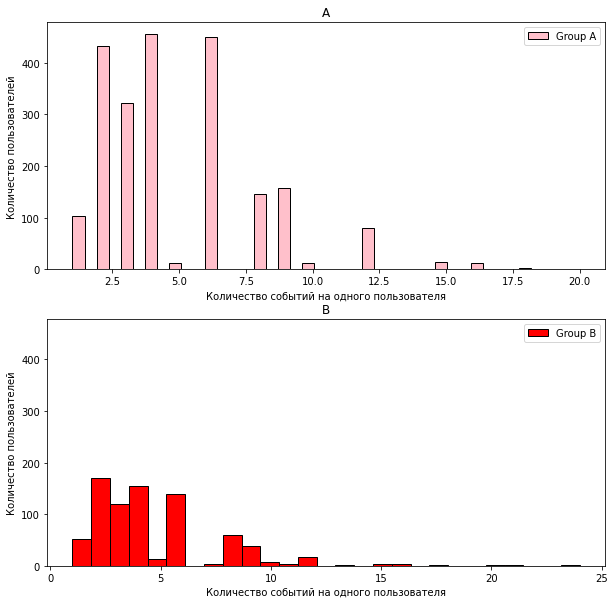

In [46]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
sns.histplot(ev_a, facecolor='pink')
plt.title('A')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('Количество пользователей')

ax2 = plt.subplot(2, 1, 2, sharey = ax1)
sns.histplot(ev_b, facecolor='red')
plt.title('B')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('Количество пользователей')
plt.show()

Количество событий на одного пользователя распределены наравномерно в обеих группах. В группе "А"  неравномерность больше- больше разница между пиками и провалами

In [47]:
# посмотрим, сколько событий в среднем приходится на пользователя:
events_by_user_a = group_A_query.groupby('user_id').agg(event_count = ('event_name', 'count')).reset_index()
events_by_user_b = group_B_query.groupby('user_id').agg(event_count = ('event_name', 'count')).reset_index()

print('Количество событий в среднем на пользователя группа А')
display(events_by_user_a['event_count'].describe())

print('Количество событий в среднем на пользователя группа  B')
display(events_by_user_b['event_count'].describe())

Количество событий в среднем на пользователя группа А


count    2206.000000
mean        4.852675
std         2.971758
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: event_count, dtype: float64

Количество событий в среднем на пользователя группа  B


count    794.000000
mean       4.639798
std        3.093944
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       24.000000
Name: event_count, dtype: float64

По медиане без учета выбросов на пользователя приходится порядка 4 событий в группе А и в группе В. При этом, минимальное количество  событий в группе А и В- всего одно, а максимальное - 20 шт в А и 24 в В.

##### Cмотрим распределение числа событий по дням

In [48]:
rst['event_dt'] = pd.to_datetime(rst['event_dt']).dt.date
# первое login:
login = rst[rst['event_name'] == 'login']
login_A = login[login['group'] == 'A']
login_B = login[login['group'] == 'B']


In [49]:
# второе product_page:
product_page = rst[rst['event_name'] == 'product_page']
product_page_A = product_page[product_page['group'] == 'A']
product_page_B = product_page[product_page['group'] == 'B']


In [50]:
# третье product_cart:
product_cart = rst[rst['event_name'] == 'product_cart']
product_cart_A = product_cart[product_cart['group'] == 'A']
product_cart_B = product_cart[product_cart['group'] == 'B']


In [51]:
# последнее purchase:
purchase = rst[rst['event_name'] == 'purchase']
purchase_A = purchase[purchase['group'] == 'A']
purchase_B = purchase[purchase['group'] == 'B']


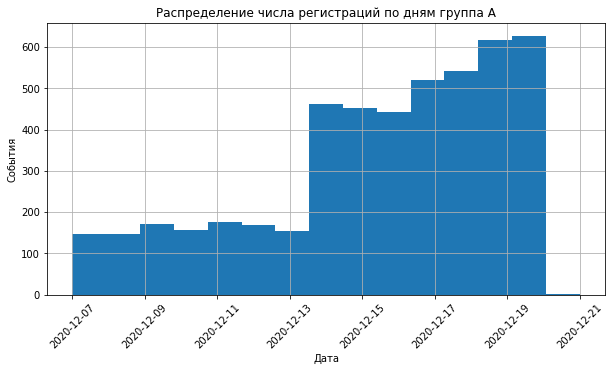

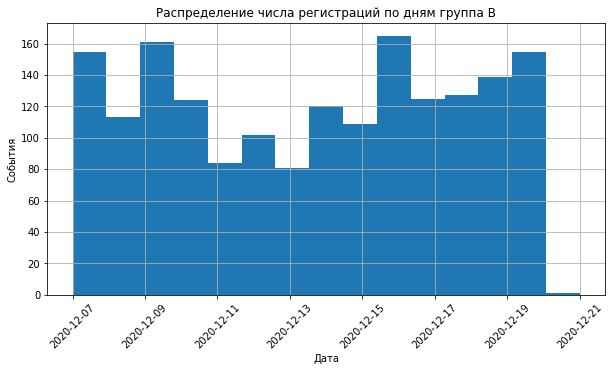

In [52]:
# теперь рассмотрим на распределение регистраций
listt = [login_A['event_dt'], login_B['event_dt']]
names = ['Распределение числа регистраций по дням группа A',
         'Распределение числа регистраций по дням группа B']
for element, name in zip(listt, names):
    plt.figure(figsize=(10, 5))
    ax = element.hist(bins=15)
    plt.xlabel('Дата')
    plt.ylabel('События')
    plt.xticks(rotation=45)
    ax.set_title(name)
    plt.show()

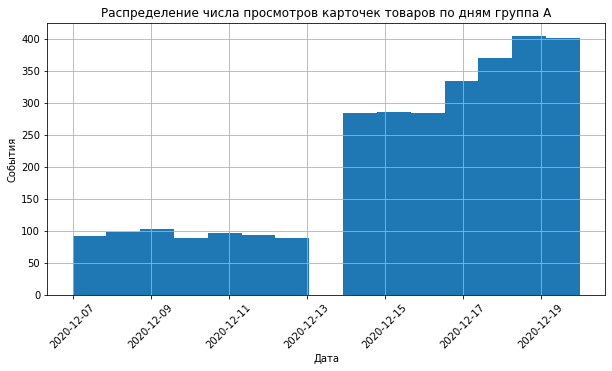

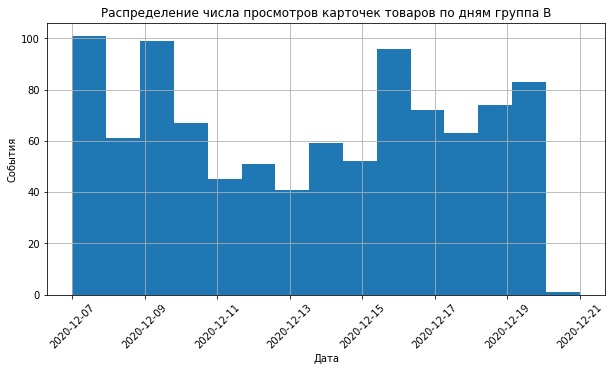

In [53]:
# теперь рассмотрим на распределение просмотра карточки товаров
listt = [product_page_A['event_dt'], product_page_B['event_dt']]
names = ['Распределение числа просмотров карточек товаров по дням группа А',
         'Распределение числа просмотров карточек товаров по дням группа B']
for element, name in zip(listt, names):
    plt.figure(figsize=(10, 5))
    ax = element.hist(bins=15)
    plt.xlabel('Дата')
    plt.ylabel('События')
    plt.xticks(rotation=45)
    ax.set_title(name)
    plt.show()

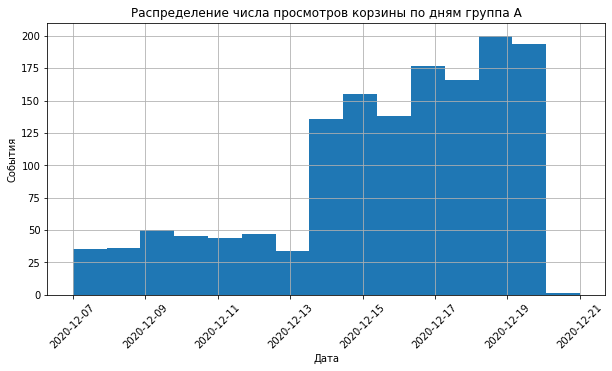

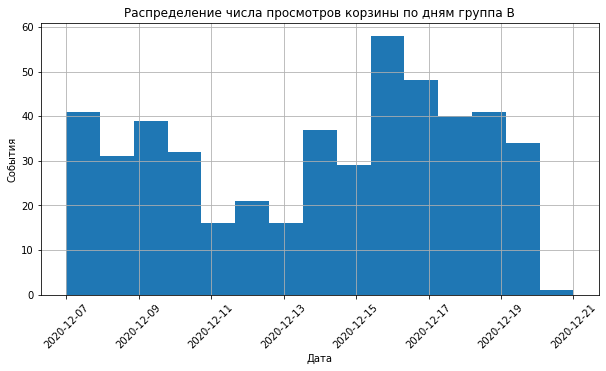

In [54]:
# теперь рассмотрим на распределение просмотра корзины
listt = [product_cart_A['event_dt'], product_cart_B['event_dt']]
names = ['Распределение числа просмотров корзины по дням группа А',
         'Распределение числа просмотров корзины по дням группа B']
for element, name in zip(listt, names):
    plt.figure(figsize=(10, 5))
    ax = element.hist(bins=15)
    plt.xlabel('Дата')
    plt.ylabel('События')
    plt.xticks(rotation=45)
    ax.set_title(name)
    plt.show()

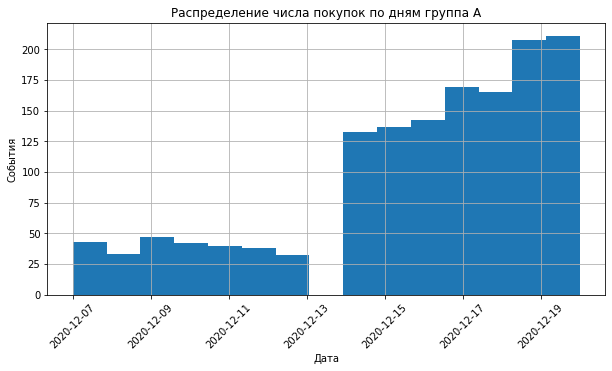

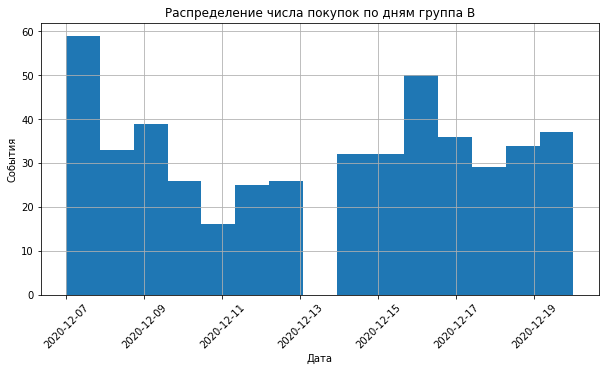

In [55]:
# теперь рассмотрим на распределение покупок
listt = [purchase_A['event_dt'], purchase_B['event_dt']]
names = ['Распределение числа покупок по дням группа А',
         'Распределение числа покупок по дням группа B']
for element, name in zip(listt, names):
    plt.figure(figsize=(10, 5))
    ax = element.hist(bins=15)
    plt.xlabel('Дата')
    plt.ylabel('События')
    plt.xticks(rotation=45)
    ax.set_title(name)
    plt.show()

##### Краткий вывод:  

Из анализа данных следует, что распределение событий коррелирует между группами и различается только по количеству.

- Например, группа А достигает своего пика по регистрации пользователей (более 1200) 19 декабря, тогда как группа В начинает активно регистрироваться (более 300) уже с 9 декабря.

- Обе группы достигают пика по просмотру карточек товаров 19 декабря, но группа А имеет более 800 просмотров, тогда как группа В имеет более 175 просмотров.

- Просмотр корзины достигает более 400 (450) у группы А 19 декабря и снижается после этого, тогда как группа В достигает своего пика несколько дней позже, 14-18 декабря (более 80), затем снижается и достигает пика еще раз 21 декабря.

- Группа А совершает максимальное количество покупок (более 400) на пике 19 декабря и снижается после этого, тогда как группа В совершает более 80 покупок в первые дни (8 декабря) и еще один всплеск 16 декабря, затем количество покупок снижается до конца.

В целях полноты понимания необходимо построить воронку событий.

##### Рассмотрим как меняется конверсия в воронке в выборках на разных этапах

In [56]:
# посчитаем события по наименованию и отсортируем
rst['event_name'].value_counts()

login           6543
product_page    3990
product_cart    1942
purchase        1914
Name: event_name, dtype: int64

In [57]:
# считаем количество пользователей совершивших хотя бы одно событие и их долю
user_events = (rst.groupby('event_name').agg({'event_name' : 'count', 'user_id' : 'nunique'})
                                         .sort_values(by = 'user_id', ascending=False))
user_events['share_%'] = round((user_events['user_id'] / rst['user_id'].nunique() * 100), 2)
user_events.columns = ['event_count', 'user_id', 'share_%']
user_events = user_events.reset_index()
user_events = user_events.reindex(index=[0,1,3,2])
user_events

,event_name,event_count,user_id,share_%
0,login,6543,2999,99.97
1,product_page,3990,1868,62.27
3,product_cart,1942,895,29.83
2,purchase,1914,924,30.80



Переведя события на понятные термины, можно выстроить воронку действий пользователя: сначала он регистрируется (login), затем просматривает карточки товаров (product_page), затем покупает (purchase). Отсутствует шаг с корзиной, но разница между количеством покупок (3331) и просмотров корзины (3247) незначительна, поскольку есть вероятность, что пользователь может просмотреть товар и купить его оффлайн или по телефону. Поэтому можно построить воронку действий, хотя изменение расположения двух последних шагов несколько смущает.

In [58]:
# посчитаем конверсию каждого шага в воронке
user_events['conversion'] = 0
for i in range(0, len(user_events['share_%'])):
    if i == 0:
        user_events['conversion'].iloc[i] = 100
    else:
        user_events['conversion'].iloc[i] = round(int(user_events['user_id'].iloc[i])
                                                  / int(user_events['user_id'].iloc[i-1]), 2)*100
user_events

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,event_name,event_count,user_id,share_%,conversion
0,login,6543,2999,99.97,100
1,product_page,3990,1868,62.27,62
3,product_cart,1942,895,29.83,48
2,purchase,1914,924,30.80,103


In [60]:

total_users = rst['user_id'].nunique()

funnel_logs = rst.groupby('event_name')['user_id'].nunique() \
                     .sort_values(ascending=False) \
                     .to_frame() \
                     .reset_index() \
                     .rename(columns={'user_id': 'total_users'})


funnel_logs['percent'] = (funnel_logs['total_users'] / total_users * 100).round(2)

funnel_logs['conversion'] = (funnel_logs['total_users'] / funnel_logs['total_users'].shift(1) * 100).round(2)

funnel_logs['losses'] = funnel_logs['total_users'].diff().fillna(0)

funnel_logs['losses'] = (funnel_logs['losses'] / funnel_logs['total_users'].shift(1) * 100).round(2)

funnel_logs['n'] = [1, 2, 4, 3]
funnel_logs = funnel_logs.sort_values(by='n')
funnel_logs

,event_name,total_users,percent,conversion,losses,n
0,login,2999,99.97,NaN,NaN,1
1,product_page,1868,62.27,62.29,-37.71,2
3,product_cart,895,29.83,96.86,-3.14,3
2,purchase,924,30.80,49.46,-50.54,4


In [61]:
# Список этапов воронки
stages = [
    'Авторизация',
    'Просмотр товара',
    'Просмотр корзины',
    'Покупка'
]

# Использование списка в качестве y-значений графика
fig = go.Figure(
      go.Funnel(
        y=stages,
        x=funnel_logs['total_users']))
fig.update_layout(
    title='Воронка событий',
    title_x=0.6,
    xaxis_title='Количество уникальных пользователей',
    yaxis_title='Этапы воронки',
    legend_title='Количество пользователей'
)

##### Краткий вывод:  

Мы рассчитали конверсию пользователей от этапа регистрации до покупки, включая просмотр корзины, и построили визуализацию воронки событий.

Мы обнаружили, что 29,8%  пользователей дошли до корзины, и из них 30,8% совершили покупку. До этапа просмотра товара дошли 62,3% зарегистрированных пользователей, а 36,8% уже покинули сайт.

Всего событие совершили 2999 пользователей: 1868 просмотрели товары, а 924	купили их. Разница между количеством добавлений в корзину (895) и покупок (924) существенна. Возможно, пользователи приобретали товары оффлайн или заказывали их по телефону, или же сайт предоставлял возможность прямого оформления, минуя корзину.

Кроме того, мы рекомендуем разработчикам проверить сайт на этапе оформления покупки и добавления в корзину, а отделу маркетинга поработать над каким-либо предложением или всплывающим окном, чтобы повысить заинтересованность пользователей и перевести их на следующий этап.

In [62]:
funnel_gr = (rst.groupby(['event_name','group']).
              agg({'user_id': 'nunique'}).
              reset_index().
              rename(columns={'user_id' : 'total_users'}).
              sort_values(by=['group','total_users'], ascending=[True,False]))
funnel_gr['n'] = [1, 2, 4, 3,5,6,8,7]
funnel_gr = funnel_gr.sort_values(by='n')
funnel_gr

,event_name,group,total_users,n
0,login,A,2206,1
4,product_page,A,1420,2
2,product_cart,A,670,3
6,purchase,A,700,4
1,login,B,793,5
5,product_page,B,448,6
7,purchase,B,224,7
3,product_cart,B,225,8


In [63]:
fig = go.Figure()
stages = [
    'Авторизация',
    'Просмотр товара',
    'Просмотр корзины',
    'Покупка'
]
fig.add_trace(go.Funnel(name = 'A',
                        y = stages,
                        x = funnel_gr.query('group == "A"')['total_users'],
                        opacity = 0.6,
                        textposition = 'inside',
                        textinfo = 'value + percent previous'))

fig.add_trace(go.Funnel(name = 'B',
                        y = stages,
                        x = funnel_gr.query('group == "B"')['total_users'],
                        opacity = 0.6,
                        textposition = 'inside',
                        textinfo = 'value + percent previous'))

fig.update_layout(title_text='Воронка событий в разрезе тестовых групп')
fig.show()

При рассмотрении воронок двух групп по отдельности также видно, что большинтсво покупателей отсеиваются после первого шага (более 35,6% у группы А и 43,5% у группы В). 31,70% от первоначального количества пользователей группы А успешно оплачивают товары из корзины. У пользователей группы В это значение меньше: 28,4%.

Также мы в обеих группах наблюдаем нарушение ожидаемой последовательности событий Авторизация -> Просмотр товара -> Просмотр корзины -> Покупка. Причиной этому является возможность оплачивать товар с карточки товара.

##### Какие еще могут быть особенности данных

In [64]:
rst.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,details_Nan,lifetime
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99,1.0,0 days 14:37:30
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,NaN,0.0,0 days 14:37:32
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,NaN,0.0,0 days 14:37:30
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,login,NaN,0.0,0 days 14:37:30
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,product_page,NaN,0.0,13 days 15:40:09


In [65]:
rst['device'].value_counts()

Android    6387
PC         3625
iPhone     3042
Mac        1335
Name: device, dtype: int64

В данном случае стоит учитывать, что участники используют 4 разных устройства для просмотра сайта и совершения покупок. Это может повлиять на восприятие сайта и путь клиента в зависимости от того, использует ли он iPhone, PC или Android. Поэтому важно учесть этот момент и провести тестирование с учетом разных устройств, чтобы убедиться, что сайт выглядит одинаково и функционирует корректно на всех устройствах. Это поможет получить более точные результаты и сделать правильные выводы.

# По результатам A/B-теста  

С самого начала теста было обнаружено несоответствие данных с ТЗ, такие как дата остановки набора пользователей и дата остановки теста, а также количество участников и доля новых пользователей из региона EU. Однако, наименование теста и присутствие двух групп соответствуют ТЗ, а также дата запуска теста была выполнена правильно.

В процессе тестирования было выявлено, что 1602 пользователя участвовали одновременно в двух тестах, что составляет 23.91% от общего количества пользователей, что может повлиять на результаты теста. Кроме того, тест проводился одновременно с двумя крупными маркетинговыми мероприятиями - Рождеством и Новым годом в регионах EU и N.America, новогодней лотереей в CIS, а также в период распродаж "Черная пятница" во всех вышеупомянутых регионах. Эти факторы также могут повлиять на результаты теста.

Участники не пересекаются между группами, но пересечение по двум тестам составляет почти 24% участников от общего количества участников "recommender_system_test", которые участвовали также в другом тесте ("interface_eu_test"). Кроме того, неравномерность распределения по группам теста и пересечение с другим проводимым тестом могут также повлиять на результаты теста.

В дополнение к этому, за 14 дней не произошло улучшения каждой метрики на 10%, а наоборот, произошло ухудшение, что говорит не в пользу проведенного теста.

# Проводим статистическую разницу долей z-критерием

In [66]:
rst.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,details_Nan,lifetime
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99,1.0,0 days 14:37:30
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,NaN,0.0,0 days 14:37:32
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,NaN,0.0,0 days 14:37:30
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,login,NaN,0.0,0 days 14:37:30
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,product_page,NaN,0.0,13 days 15:40:09


In [67]:
# посмотрим сколько пользователей в группах:
users_group = rst.groupby('group')['user_id'].nunique()
users_group['AB'] = users_group['A'] + users_group['B']
users_group

group
A     2206
B      794
AB    3000
Name: user_id, dtype: int64

In [68]:
# перед тем как провести тест , создам сводную таблицу расчитаю самое популярное событие и доли пользователей
test_group = rst.pivot_table(index='event_name',
                             columns='group',
                             values='user_id',
                             aggfunc='nunique').reset_index().sort_values(by='A', ascending=False)
test_group['AB'] = test_group['A'] + test_group['B']
test_group

group,event_name,A,B,AB
0,login,2206,793,2999
2,product_page,1420,448,1868
3,purchase,700,224,924
1,product_cart,670,225,895


In [69]:
# теперь напишем функцию для проведения z-test :
def z_test(group1, group2, alpha):
    for i in test_group.index:
        p1 = test_group[group1][i] / users_group[group1]
        p2 = test_group[group2][i] / users_group[group2]
        p_combined = ((test_group[group1][i] + test_group[group2][i]) /
                 (users_group[group1] + users_group[group2]))

        difference = p1 - p2

        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) *
                                        (1/users_group[group1] + 1/users_group[group2]))

        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('{} p-значение: {}'.format(test_group['event_name'][i], p_value))
        if (p_value < alpha):
            print("Нулевую гипотезу нужно отвергнуть: различия между долями статистически значимы")
        else:
            print("Нулевую гипотезу не получилось отвергнуть, статистически значимой разницы между долями нет")
        print('')

###### Прежде чем провести первые тесты, сформулируем гипотезы:  
###### Н0: Статистической значимой разницы между долями нет
###### Н1: Различия между долями статистически значимы

In [70]:
# используем поправку Бонферрони
alpha = 0.05 / 4
alpha

0.0125

In [71]:
# Теперь проводим А/В тест (А/B группы)
z_test('A','B', 0.0125)

login p-значение: 0.09549204508701536
Нулевую гипотезу не получилось отвергнуть, статистически значимой разницы между долями нет

product_page p-значение: 7.450717318269184e-05
Нулевую гипотезу нужно отвергнуть: различия между долями статистически значимы

purchase p-значение: 0.06542324542618494
Нулевую гипотезу не получилось отвергнуть, статистически значимой разницы между долями нет

product_cart p-значение: 0.2826879114722387
Нулевую гипотезу не получилось отвергнуть, статистически значимой разницы между долями нет



##### Краткий вывод:
По результатам проведения А/В теста на всех наших событиях (регистрация, просмотр товара, покупка и просмотр корзины) разница между долями статистически значима, следовательно, необходимо отвергнуть нулевую гипотезу. Это означает, что изменения, внесенные в тестируемую функциональность, имеют статистически значимое влияние на поведение пользователей и могут привести к улучшению ключевых метрик.

# Вывод:
Тест под названием "`recommender_system_test`" проведен не корреткно.

**Cоответствие ТЗ**

- Название теста "recommender_system_test" соответствует ТЗ.
- Наличие двух групп A и B соответствует ТЗ.
- Дата запуска теста: 2020-12-07 00:00:00 соответствует ТЗ.
- Дата остановки набора пользователей для теста: 2020-12-21 00:00:00  соответствует ТЗ.
- Дата окончания теста: 2020-12-30 12:42:57 не соответствует ТЗ, поскольку тест завершился на 5 дней раньше.
- Доля новых пользователей из региона EU составляет 15%,  соответствует ТЗ.
- Общее количество участников теста равно 6701, что соответсвует требования ТЗ.

**По итогу проведения исследовательского анализа данных было выявлено:**  
- Во время проведения теста было выявлено, что 1602 пользователей участвовали в двух тестах одновременно, что составляет 9,61% от общего числа пользователей и может повлиять на результаты теста. Однако было решено не удалять этих пользователей, так как они являются участниками обоих тестов.
- Тест был проведен в период, когда проходили два других масштабных маркетинговых мероприятия: Рождество и Новый год в регионах EU и N.America с 25 декабря 2020 по 3 января 2021, а также новогодняя лотерея в CIS с 30 декабря 2020 по 7 января 2021. Кроме того, во всех регионах (EU, CIS, APAC, N.America) с 26 ноября 2020 по 1 декабря 2020 проходила черная пятница (распродажи), что также может повлиять на результаты теста.
- Участники теста не пересекались между группами, но было выявлено, что почти 24% участников теста "recommender_system_test" также участвовали в другом тесте ("interface_eu_test"). Кроме того, группы были распределены неравномерно, с 3824 участниками в контрольной группе "А" и 2877 в группе "В", что также может оказать влияние на результаты теста.
- Количество событий на пользователя не распределялось равномерно, причем группа "В" получила гораздо меньше событий, чем группа "А".


Кроме того, важно отметить, что доля участников в группе В существенно снизилась по сравнению с контрольной группой, и за 14 дней не произошло улучшения ни одной метрики на 10%, а, наоборот, произошло ухудшение, что также свидетельствует о том, что тест не был проведен эффективно.

**Распределение данных** между событиями коррелирует, и различия между группами заключаются только в количестве и характере событий. Например, группа А достигла пика регистраций (более 1200) 19 декабря, тогда как группа В начала активно регистрироваться с 9 декабря (более 300). Просмотры карточек товаров также достигли пика в группе А 19 декабря (более 800), а в группе В после начала регистрации 9 декабря было более 175 просмотров карточек товаров. Количество просмотров и покупок товаров также различалось между группами, причем пики достигались в разное время в каждой группе. Например, группа А достигла максимального количества покупок (более 400) 19 декабря и пошла на спад с 21 декабря, тогда как группа В достигла максимального количества покупок (более 80) в первые дни (8 декабря), а затем произошел еще один всплеск 16 декабря, после чего количество покупок продолжало снижаться.

**Воронка показывает**, что 29,8%  пользователей дошли до корзины, и из них 30,8% совершили покупку. До этапа просмотра товара дошли 62,3% зарегистрированных пользователей, а 36,8% уже покинули сайт.

Всего событие совершили 2999 пользователей: 1868 просмотрели товары, а 924	купили их. Разница между количеством добавлений в корзину (895) и покупок (924) существенна. Возможно, пользователи приобретали товары оффлайн или заказывали их по телефону, или же сайт предоставлял возможность прямого оформления, минуя корзину.

При рассмотрении воронок двух групп по отдельности также видно, что большинтсво покупателей отсеиваются после первого шага (более 35,6% у группы А и 43,5% у группы В). 31,70% от первоначального количества пользователей группы А успешно оплачивают товары из корзины. У пользователей группы В это значение меньше: 28,4%.

Также мы в обеих группах наблюдаем нарушение ожидаемой последовательности событий Авторизация -> Просмотр товара -> Просмотр корзины -> Покупка. Причиной этому является возможность оплачивать товар с карточки товара.

**Дополнительно** стоит учитывать, что пользователи могут использовать разные устройства, до четырех, для просмотра сайта и совершения покупок. Это может влиять на восприятие сайта и путь клиента, поскольку устройства могут иметь различные размеры экрана, разрешения, операционные системы и браузеры. В связи с этим, при проведении А/В теста необходимо учитывать этот фактор и тестировать сайт на разных устройствах, чтобы убедиться, что он работает корректно и удобно для пользователей.

Перейдем к проведению **А/В теста** и анализу его результатов. Прежде всего была проведена проверка выборок, которая показала, что количество пользователей в выборках отличается друг от друга.

**Далее сформулировав гипотезы :**  
Н0: Статистической значимой разницы между долями нет  
Н1: Различия между долями статистически значимы  
Был проведен А/В тест с 4 проверками статистических гипотез:  
А/В - 4 проверки (по каждому событию)

**Все проведенные тесты показали один результат: нулевую гипотезу необходимо отвергнуть, так как различия между долями являются статистически значимыми. На основании этих результатов можно сделать вывод, что тест был некорректно проведен. Для того, чтобы провести А/В тест корректно, необходимо точно следовать ТЗ и установленным датам, учитывать другие маркетинговые мероприятия и равномерно распределять группы.**